In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('classic')


In [3]:
base = "https://raw.githubusercontent.com/pathstream-curriculum/Python/master/"
retail_features = "retail_features_4stores.csv"
retail_sales = "retail_sales_4stores.csv"

In [4]:
retail_sales_df = pd.read_csv(base + retail_sales)
retail_features_df = pd.read_csv(base + retail_features)

In [5]:
# convert Date to datetime
retail_sales_df["Date"] = pd.to_datetime(retail_sales_df.Date)
retail_features_df["Date"] = pd.to_datetime(retail_sales_df.Date)
# convert Store and Dept to string
retail_sales_df["Store"] = retail_sales_df.Store.astype("str")
retail_sales_df["Dept"] = retail_sales_df.Dept.astype("str")
retail_features_df["Store"] = retail_features_df.Store.astype("str")

#deal with the sorting issue up front
retail_sales_df.sort_values("Date", inplace=True)
retail_features_df.sort_values("Date", inplace=True)

In [6]:
retail_sales_df.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1178,Los Angeles,Clothing,2010-01-10,27023.35,False
31,2751,Buffalo,Jewelry,2010-01-10,6947.26,False
30,1464,Los Angeles,Furniture,2010-01-10,12390.87,False
29,3609,Seattle,Housewares,2010-01-10,88537.23,False
28,463,Las Vegas,Jewelry,2010-01-10,34912.45,False


In [9]:
retail_sales_elec = retail_sales_df.loc[retail_sales_df["Dept"] == "Electronics"]

(array([252., 218.,  71.,  14.,   5.,   5.,   2.,   3.,   1.,   1.]),
 array([  4730.87 ,  21750.036,  38769.202,  55788.368,  72807.534,
         89826.7  , 106845.866, 123865.032, 140884.198, 157903.364,
        174922.53 ]),
 <a list of 10 Patch objects>)

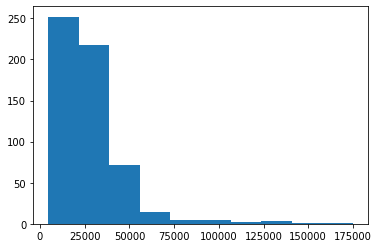

In [10]:
plt.hist(retail_sales_elec["Weekly_Sales"])

In [13]:
retail_sales_elec.sort_values("Weekly_Sales", ascending=False)

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday
1476,4050,Seattle,Electronics,2010-12-24,174922.53,False
1475,1762,Los Angeles,Electronics,2010-12-24,150343.42,False
3148,4102,Seattle,Electronics,2011-12-23,140165.76,False
1333,4046,Seattle,Electronics,2010-11-26,129860.88,True
3048,4098,Seattle,Electronics,2011-11-25,125098.69,True
...,...,...,...,...,...,...
756,2883,Buffalo,Electronics,2010-07-16,5274.61,False
567,2875,Buffalo,Electronics,2010-05-21,5079.98,False
954,2889,Buffalo,Electronics,2010-08-27,4945.21,False
167,2890,Buffalo,Electronics,2010-03-09,4862.58,False


In [14]:
retail_sales_elec_la = retail_sales_elec.loc[retail_sales_elec["Store"] == "Los Angeles"]

In [17]:
retail_sales_elec_la.sort_values("Weekly_Sales", ascending=False)[:20]

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday
1475,1762,Los Angeles,Electronics,2010-12-24,150343.42,False
3137,1814,Los Angeles,Electronics,2011-12-23,106536.90,False
1324,1758,Los Angeles,Electronics,2010-11-26,102750.26,True
3069,1810,Los Angeles,Electronics,2011-11-25,102614.71,True
1465,1761,Los Angeles,Electronics,2010-12-17,90724.19,False
1128,1760,Los Angeles,Electronics,2010-10-12,76143.28,False
3129,1813,Los Angeles,Electronics,2011-12-16,65588.98,False
3372,1822,Los Angeles,Electronics,2012-02-17,52735.59,False
281,1723,Los Angeles,Electronics,2010-03-26,51778.35,False
2679,1812,Los Angeles,Electronics,2011-09-12,51509.07,False


In [18]:
len(retail_sales_elec_la)

143

In [ ]:
# 15 from the first 50, 10 from the next 50, 5 from the last few

In [22]:
s1 = np.random.choice(retail_sales_elec_la.index[:50], 15)
s2 = np.random.choice(retail_sales_elec_la.index[50:100], 10)
s3 = np.random.choice(retail_sales_elec_la.index[100:], 5)

In [32]:
promo_indexes = pd.Series(np.concatenate((s1, s2, s3)))

In [30]:
thirty_trues

In [31]:
promo_indexes

AttributeError: 'numpy.ndarray' object has no attribute 'endswith'

AttributeError: 'numpy.ndarray' object has no attribute 'endswith'

In [32]:
retail_joined_df = retail_features_df.merge(retail_sales_df, on=["Store", "Date"])
retail_joined_df_jwl = retail_joined_df.loc[retail_joined_df["Dept"] == "Jewelry"]
retail_joined_df_jwl.drop("IsHoliday_y", axis=1, inplace=True)

/Users/caldermyers/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
